#**Joint Online Faculty Development programme on Machine Learning for Computer Vision(Feb 21 – Mar 4, 2022)**

---

* Transfer learning is a method where knowledge gathered from one problem are used to solve similar or new problem.
* Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

**How to perform transfer learning?**
1. Take layers from a previously trained model.
2. Freeze all/some initial layers of the model.
3. Add some new layers in the model.
4. Train the new layers on new dataset.

**Smoke detection dataset:**  https://www.kaggle.com/eddwait/forest-fire-from-himawari8-satellite

It is a satellite dataset consisting of smoke and non-smoke images.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Change the working directory**

In [ ]:
%cd /content/drive/MyDrive/FDP Feb 2022/Day 5

/content/drive/MyDrive/FDP Feb 2022/Day 5


In [ ]:
!ls

 cnnmodel.h5			      data	       satellite_data.zip
 CNN_PyTorch.ipynb		      model.pth        split_data
'Convolutiona Neural Network.ipynb'   satellite_data   weights.h5


**2. Reading and pre-processing th data**

In [ ]:
from tensorflow import keras

data_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

train_data = data_gen.flow_from_directory('split_data/train', target_size=(224,224), batch_size=8, class_mode='categorical')
valid_data = data_gen.flow_from_directory('split_data/val', target_size=(224,224), batch_size=8, class_mode='categorical')
test_data = data_gen.flow_from_directory('split_data/test', target_size=(224,224), batch_size=8, class_mode='categorical')

Found 324 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


**3. Downloading the model with weights**

In [ ]:
base_model = keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=(224,224,3))
base_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

**4. Set the layers non-trainable**

In [ ]:
base_model.trainable = False

**5. Adding more layers in the model**

In [ ]:
base = base_model.layers[-1].output
gap_layer = keras.layers.GlobalAveragePooling2D()(base)
output = keras.layers.Dense(2, activation= 'softmax')(gap_layer)

new_model =  keras.models.Model(inputs=base_model.input, outputs = output)
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

**6. Model compilation**

In [ ]:
optim = keras.optimizers.Adam(learning_rate = 0.001)
new_model.compile(optimizer=optim, loss='categorical_crossentropy', metrics = ['accuracy'])

**7. Model training**

In [ ]:
history = new_model.fit(train_data, batch_size = 8, validation_data = valid_data, epochs=2)

Epoch 1/2
41/41 [==============================] - 88s 2s/step - loss: 0.5723 - accuracy: 0.7932 - val_loss: 0.5110 - val_accuracy: 0.8750
Epoch 2/2
41/41 [==============================] - 36s 881ms/step - loss: 0.4403 - accuracy: 0.9660 - val_loss: 0.4105 - val_accuracy: 0.9500


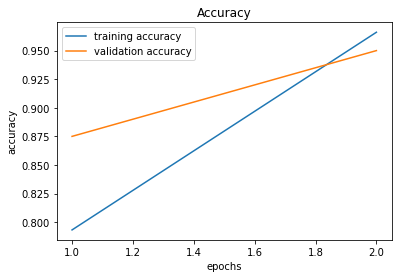

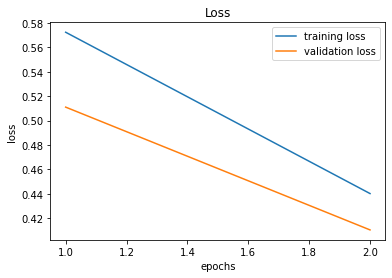

In [ ]:
import matplotlib.pyplot as plt
acc= history.history['accuracy']
val_acc= history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs = range(1,len(acc)+1) 

plt.plot(epochs, acc, label='training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss')
plt.show()

**8. Model evaluation**

In [ ]:
new_model.evaluate(test_data)

6/6 [==============================] - 13s 3s/step - loss: 0.3923 - accuracy: 1.0000


[0.39232122898101807, 1.0]

**9. Prediction on unknown data**

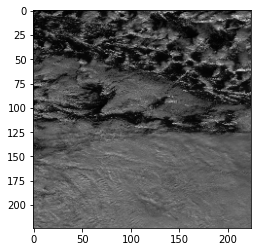

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/FDP Feb 2022/Day 5/split_data/test/smoke/1105.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [ ]:
out = new_model.predict(img.reshape(1,224,224,3))

In [ ]:
import numpy as np
out = np.argmax(out)

In [ ]:
print(out)

1


In [ ]:
print(test_data.class_indices)

{'non-smoke': 0, 'smoke': 1}


In [ ]:
pip install keract

In [ ]:
from keract import get_activations

In [ ]:
# call to fetch the activations of the model.
activations = get_activations(new_model, img.reshape(1,224,224,3), layer_names='block5_pool',  auto_compile=True)
print(activations)
# print the activations shapes.

{'block5_pool': array([[[[0.        , 0.        , 0.23091766, ..., 0.        ,
          1.0912926 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.1905818 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.2618932 , 0.        ],
         ...,
         [0.        , 0.        , 0.20565271, ..., 0.        ,
          1.1804281 , 0.        ],
         [0.        , 0.        , 0.3312214 , ..., 0.        ,
          1.1112734 , 0.        ],
         [0.        , 0.        , 0.17571756, ..., 0.        ,
          0.9645597 , 0.        ]],

        [[0.        , 0.        , 0.33594808, ..., 0.        ,
          1.2448081 , 0.        ],
         [0.        , 0.        , 0.08712375, ..., 0.        ,
          1.4086759 , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          1.3750407 , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
         

block5_pool (1, 7, 7, 512) 


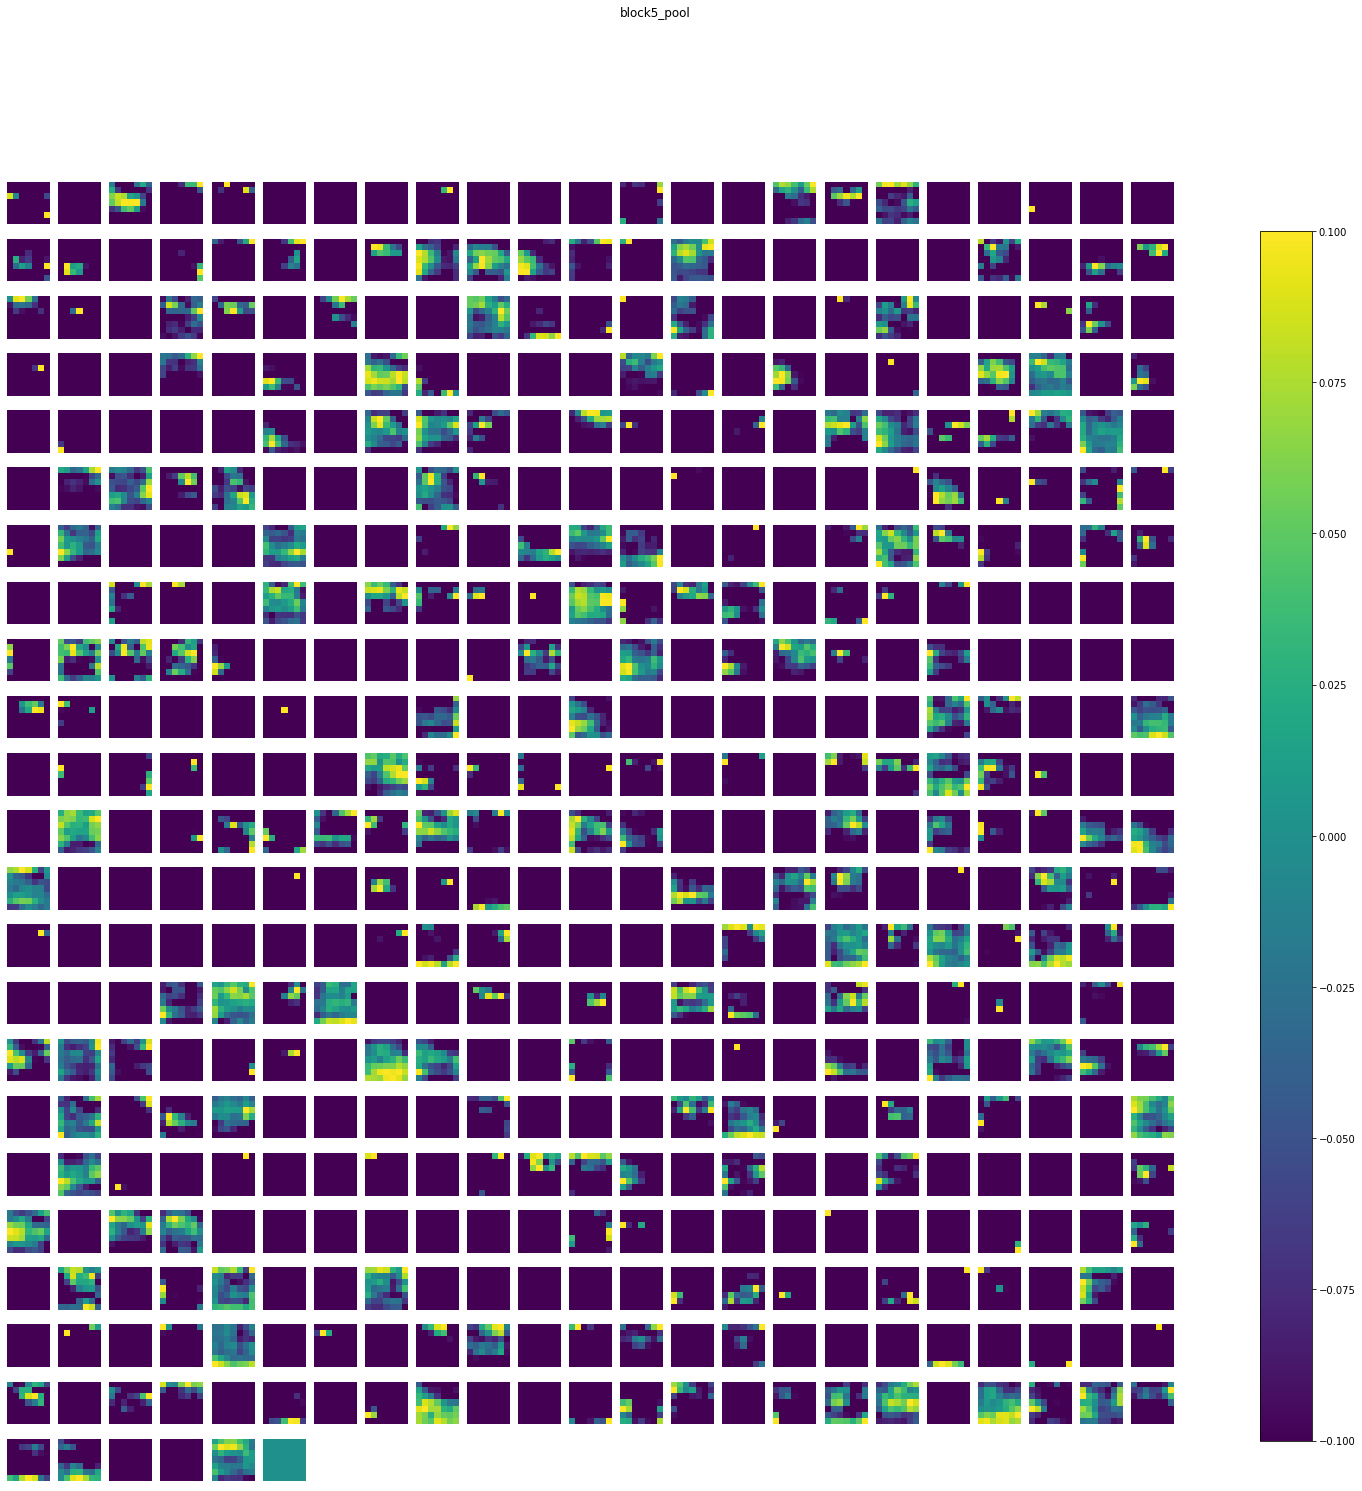

In [ ]:
import keract
keract.display_activations(activations,cmap=None, save=False, directory='.', data_format='channels_last', fig_size=(24, 24), reshape_1d_layers=False)

**Reference**
1. https://keras.io/api/applications/